In [41]:
# import lib
import sys
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from kumaraswamy import kumaraswamy
sns.set_style('darkgrid')
np.random.seed(42)

In [ ]:
# Define the multi-armed bandits
nb_bandits = 3  # Number of bandits
# True probability of winning for each bandit
p_bandits = [0.45, 0.55, 0.90]

def pull(i):
    """Pull arm of bandit with index `i` and return 1 if win, 
    else return 0."""
    if np.random.rand() < p_bandits[i]:
        return 1
    else:
        return 0
    
def plot(priors, step, ax):
    """Plot the priors for the current step."""
    plot_x = np.linspace(0.001, .999, 100)
    for prior in priors:
        y = prior.pdf(plot_x)
        p = ax.plot(plot_x, y)
        ax.fill_between(plot_x, y, 0, alpha=0.2)
    #ax.set_xlim([0, 1])
    #ax.set_ylim(bottom=0)
    ax.set_title(f'Priors at step {step:d}')
    
# Iterations to plot
plots = [1, 2, 5, 10, 25, 50, 100, 200, 500, 1000]

# Setup plot
fig, axs = plt.subplots(5, 2, figsize=(8, 10))
axs = axs.flat

# The number of trials and wins will represent the prior for each
#  bandit with the help of the Beta distribution.
trials = [0, 0, 0]  # Number of times we tried each bandit
wins   = [0, 0, 0]  # Number of wins for each bandit

n = 1000
# Run the trail for `n` steps
for step in range(1, n+1):
    # Define the prior based on current observations
#     bandit_priors = [stats.beta (a=1+w,b=1+t-w) for t, w in zip(trials, wins)]
#     bandit_priors = [kumaraswamy(a=1+w,b=1+t-w) for t, w in zip(trials, wins)]
    bandit_priors = [stats.uniform(t-w,1) for t, w in zip(trials, wins)]

    if step in plots: plot(bandit_priors, step, next(axs))
        
    # Sample a probability theta for each bandit
    theta_samples = [d.rvs(size=1) for d in bandit_priors]
    print(theta_samples)
    
    # choose a bandit
    chosen_bandit = np.argmax(theta_samples)
    x = pull(chosen_bandit)
    
    # Update trials and wins (defines the posterior)
    trials[chosen_bandit] += 1; wins  [chosen_bandit] += x

plt.tight_layout()
plt.show()

[array([0.84042054]), array([0.08340311]), array([0.23915943])]
[array([0.95339173]), array([0.62735416]), array([0.71621521])]
[array([0.19401056]), array([0.80988847]), array([0.56773086])]
[array([0.56566977]), array([0.47538544]), array([0.1536937])]
[array([1.17381763]), array([0.81145011]), array([0.61848933])]
[array([2.42466626]), array([0.51192089]), array([0.76058446])]
[array([3.57198419]), array([0.55333899]), array([0.4913155])]
[array([4.48521164]), array([0.90079455]), array([0.80861665])]
[array([5.89865851]), array([0.53709331]), array([0.82184093])]
[array([5.07297564]), array([0.68500063]), array([0.3016103])]
[array([6.07739435]), array([0.95564775]), array([0.51511468])]
[array([6.47607688]), array([0.78972084]), array([0.86521908])]
[array([7.1259365]), array([0.90616994]), array([0.98117039])]
[array([7.07806781]), array([0.56559447]), array([0.53390045])]
[array([8.31711261]), array([0.05034307]), array([0.58035114])]
[array([8.34125911]), array([0.58244918]), a

[array([108.41524392]), array([0.9218724]), array([0.63272084])]
[array([109.53069075]), array([0.06330053]), array([0.80759098])]
[array([109.27016867]), array([0.71539839]), array([0.37080791])]
[array([110.42157388]), array([0.50463537]), array([0.22217283])]
[array([111.61017664]), array([0.23370838]), array([0.0915391])]
[array([112.46811947]), array([0.93248995]), array([0.23070026])]
[array([113.76649432]), array([0.47650457]), array([0.87377257])]
[array([114.71442168]), array([0.10155102]), array([0.16019111])]
[array([115.24541941]), array([0.55116729]), array([0.56078464])]
[array([116.56984161]), array([0.37925862]), array([0.21024493])]
[array([117.49516453]), array([0.27519365]), array([0.05118327])]
[array([117.55078155]), array([0.53561923]), array([0.13363944])]
[array([118.42264953]), array([0.65367032]), array([0.88800518])]
[array([118.3473074]), array([0.67681431]), array([0.94915552])]
[array([119.1692865]), array([0.9350051]), array([0.46977727])]
[array([120.539

[array([202.23618138]), array([0.51889701]), array([0.69175054])]
[array([203.59863863]), array([0.41529329]), array([0.63213412])]
[array([204.65199259]), array([0.6089713]), array([0.97868334])]
[array([205.69103874]), array([0.8923846]), array([0.91302128])]
[array([205.45380502]), array([0.94276919]), array([0.95976909])]
[array([205.44370443]), array([0.27865028]), array([0.79073635])]
[array([206.46924574]), array([0.67566001]), array([0.86996629])]
[array([207.15642639]), array([0.71199234]), array([0.15894713])]
[array([208.33353365]), array([0.05644366]), array([0.22648173])]
[array([209.99401623]), array([0.25571124]), array([0.9787825])]
[array([209.96001097]), array([0.95610344]), array([0.1428976])]
[array([210.51731211]), array([0.68620012]), array([0.77607557])]
[array([210.79897249]), array([0.30279417]), array([0.73236974])]
[array([211.68466506]), array([0.62287849]), array([0.81042054])]
[array([212.44910208]), array([0.39217095]), array([0.24219032])]
[array([213.96

[array([293.21239369]), array([0.93270876]), array([0.9840837])]
[array([293.15843521]), array([0.99029388]), array([0.29346462])]
[array([294.07414307]), array([0.73244093]), array([0.701395])]
[array([295.72871674]), array([0.04139962]), array([0.45045278])]
[array([295.57072632]), array([0.42832255]), array([0.28084315])]
[array([296.31113594]), array([0.85065733]), array([0.32299379])]
[array([297.82602171]), array([0.8228892]), array([0.58609216])]
[array([297.55793949]), array([0.84968355]), array([0.21878122])]
[array([297.58203222]), array([0.57404297]), array([0.29314823])]
[array([297.08852847]), array([0.13076027]), array([0.82833185])]
[array([298.09981305]), array([0.96186846]), array([0.20994144])]
[array([298.97253503]), array([0.18088585]), array([0.96872544])]
[array([299.42692284]), array([0.59492921]), array([0.50789209])]
[array([300.06284284]), array([0.81339197]), array([0.97062107])]
[array([300.19140236]), array([0.10880919]), array([0.34675556])]
[array([300.22

[array([369.54143508]), array([0.3759479]), array([0.75685422])]
[array([370.7761375]), array([0.06328213]), array([0.85837534])]
[array([371.21918419]), array([0.29889581]), array([0.90274231])]
[array([371.80172211]), array([0.92392958]), array([0.2500547])]
[array([372.16108994]), array([0.01622522]), array([0.60457433])]
[array([373.15014231]), array([0.51246754]), array([0.38549166])]
[array([373.50774228]), array([0.58513658]), array([0.21717206])]
[array([374.07260144]), array([0.55099518]), array([0.30339021])]
[array([374.89347353]), array([0.66995425]), array([0.14887859])]
[array([375.37283349]), array([0.34128453]), array([0.50153642])]
[array([375.91423599]), array([0.46788903]), array([0.3938227])]
[array([375.80268145]), array([0.95283556]), array([0.86959261])]
[array([375.75161548]), array([0.20416385]), array([0.03883439])]
[array([376.67038061]), array([0.12428756]), array([0.60551896])]
[array([377.20901045]), array([0.42778938]), array([0.49880073])]
[array([378.77

In [57]:
# Print final outcome and number of test needed per bandit
emperical_p_bandits = [(1+w) / (1+t) for t, w in zip(trials, wins)]
for i in range(nb_bandits):
    print((f'True prob={p_bandits[i]:.2f};  '
           f'Emperical prob={emperical_p_bandits[i]:.2f};  '
           f'Trials={trials[i]:d}'))

True prob=0.45;  Emperical prob=1.00;  Trials=0
True prob=0.55;  Emperical prob=1.00;  Trials=0
True prob=0.90;  Emperical prob=0.90;  Trials=1000


[ 0.20264065 -0.3246262  -1.66632893  2.26444456  1.16672842]


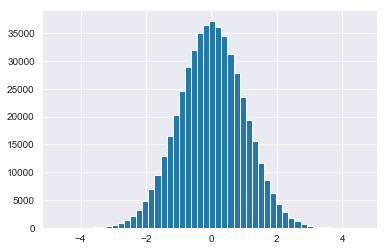

In [22]:
from scipy.stats import norm
gen = norm()
print(gen.rvs(size=5))
plt.hist(gen.rvs(size=500000),50)
plt.show()

# Reference 
1. Kite - AI-Powered Python Copilot. (2019). Kite.com. Retrieved 9 January 2019, from https://kite.com/python/docs/scipy.stats.distributions.rv_frozen.rvs
2. Multi-armed bandit implementation. (2019). Peterroelants.github.io. Retrieved 9 January 2019, from https://peterroelants.github.io/posts/multi-armed-bandit-implementation/
3. kumaraswamy. (2018). PyPI. Retrieved 9 January 2019, from https://pypi.org/project/kumaraswamy/
